In [1]:
import pandas as pd # import pandas library

In [2]:
df = pd.read_csv('ViewingActivity.csv') # read our Netflix data csv into a pandas dataframe: df

In [3]:
df.shape # gives # of rows and columns in df

(444, 10)

In [4]:
# df.head() # gives the first few rows of df
# pd.set_option('display.max_rows', None)
df.head(1)

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
0,DHILLON,2024-06-07 13:40:28,00:00:07,Autoplayed: user action: None;,I Am Legend_hook_primary_16x9,HOOK,Android DefaultWidevineL3Phone Android Phone,00:00:07,00:00:07,IN (India)


In [5]:
df.isnull().sum()

Profile Name                 0
Start Time                   0
Duration                     0
Attributes                 281
Title                        0
Supplemental Video Type    282
Device Type                  0
Bookmark                     0
Latest Bookmark              0
Country                      0
dtype: int64

In [6]:
# filtering out other profiles
df['Profile Name'] = df['Profile Name'].astype(str)
df = df[df['Profile Name' ].str.contains('khush', case=False, na=False)]
df.shape

(275, 10)

In [7]:
# cleaning the data
# drop unnecessary columns
df.drop(['Profile Name', 'Attributes', 'Supplemental Video Type', 
         'Device Type', 'Bookmark', 'Latest Bookmark', 'Country'], axis=1, inplace=True)
df.shape

(275, 3)

In [8]:
df.dtypes # gives list of datatypes for each column in df
          # 'object' datatype means they're strings

Start Time    object
Duration      object
Title         object
dtype: object

In [9]:
df['Start Time'] = pd.to_datetime(df['Start Time'], utc=True) # change datatype of 'Start Time' to datetime with timezone=utc
df.dtypes

Start Time    datetime64[ns, UTC]
Duration                   object
Title                      object
dtype: object

In [10]:
# changing timezone of 'Start Time' from 'UTC' to 'US/Eastern'
df.set_index('Start Time', inplace=True) # change 'Start Time' column into df's index
df.index = df.index.tz_convert('US/Eastern') # convert timezone
df.reset_index(inplace=True) # reset the index so 'Start Time' becomes a column again

In [11]:
# changing datatype of 'Duration' column to 'timedelta' (measure of time duration that pandas understands)
df['Duration'] = pd.to_timedelta(df['Duration'])

In [12]:
df = df[df['Duration'] > '00:02:00'] # to filter out trailers
df.shape

(169, 3)

In [13]:
df['Title'].unique() # analyzing the 'Title' column to make it make sense

array(['Brooklyn Nine-Nine: Season 5: Safe House (Episode 12)',
       'Brooklyn Nine-Nine: Season 5: Game Night (Episode 10)',
       'Brooklyn Nine-Nine: Season 5: 99 (Episode 9)',
       'Brooklyn Nine-Nine: Season 5: Return to Skyfire (Episode 8)',
       'Brooklyn Nine-Nine: Season 5: Two Turkeys (Episode 7)',
       'Brooklyn Nine-Nine: Season 5: The Venue (Episode 6)',
       'Brooklyn Nine-Nine: Season 5: Bad Beat (Episode 5)',
       'Brooklyn Nine-Nine: Season 5: HalloVeen (Episode 4)',
       'The Karate Kid',
       'Heeramandi: The Diamond Bazaar: Season 1: Heeramandi - The Swan Song (Episode 8)',
       'Heeramandi: The Diamond Bazaar: Season 1: Bibbojaan - Long Live the Revolution (Episode 7)',
       'Heeramandi: The Diamond Bazaar: Season 1: Tajdar & Alamzeb - Nation v/s Love (Episode 6)',
       'Heeramandi: The Diamond Bazaar: Season 1: Tajdar - The Lover’s Dilemma (Episode 5)',
       'Heeramandi: The Diamond Bazaar: Season 1: Alamzeb - The Innocent Pawn (Episode 4)

In [14]:
# parsing 'Title' column into 'Name', 'Season', 'Episode Name', 'Episode #'
df[['Name', 'Season', 'Episode Name', 'Episode #']] = df['Title'].str.extract('^(.*?): Season (\d+): (.*) \(Episode (\d+)\)$', expand=True)
df

,Start Time,Duration,Title,Name,Season,Episode Name,Episode #
0,2024-06-07 22:22:32-04:00,0 days 00:20:55,Brooklyn Nine-Nine: Season 5: Safe House (Epis...,Brooklyn Nine-Nine,5,Safe House,12
2,2024-06-07 22:17:23-04:00,0 days 00:04:37,Brooklyn Nine-Nine: Season 5: Game Night (Epis...,Brooklyn Nine-Nine,5,Game Night,10
8,2024-06-07 12:29:41-04:00,0 days 00:16:45,Brooklyn Nine-Nine: Season 5: Game Night (Epis...,Brooklyn Nine-Nine,5,Game Night,10
9,2024-06-06 21:55:36-04:00,0 days 00:21:23,Brooklyn Nine-Nine: Season 5: 99 (Episode 9),Brooklyn Nine-Nine,5,99,9
10,2024-06-06 21:42:12-04:00,0 days 00:13:23,Brooklyn Nine-Nine: Season 5: Return to Skyfir...,Brooklyn Nine-Nine,5,Return to Skyfire,8
...,...,...,...,...,...,...,...
252,2024-05-08 11:29:33-04:00,0 days 00:04:31,The Office (U.S.): Season 7: Nepotism (Episode 1),The Office (U.S.),7,Nepotism,1
253,2024-05-08 11:22:36-04:00,0 days 00:06:34,The Office (U.S.): Season 5: Two Weeks (Episod...,The Office (U.S.),5,Two Weeks,21
255,2024-05-07 22:13:39-04:00,0 days 00:33:36,The Gentlemen: Season 1: Tackle Tommy Woo Woo ...,The Gentlemen,1,Tackle Tommy Woo Woo,2
257,2024-05-07 15:05:09-04:00,0 days 00:38:05,The Gentlemen: Season 1: Refined Aggression (E...,The Gentlemen,1,Refined Aggression,1


In [15]:
df['Name'].unique() # gives the list of unique names of movies/shows entries
                    # notice that 'nan' is there
                    # gotta look into that

array(['Brooklyn Nine-Nine', nan, 'Heeramandi: The Diamond Bazaar',
       'BoJack Horseman', 'The Office (U.S.)', 'The Gentlemen'],
      dtype=object)

In [16]:
df['Name'].isnull().sum() # gives the sum of null values in 'Name' column

2

In [17]:
df[df['Name'].isnull()] # gives the records where 'Name' is null
                        # turns out 'Title' names with no season or episode details (probably movies) did not get parsed

,Start Time,Duration,Title,Name,Season,Episode Name,Episode #
28,2024-06-05 18:08:02-04:00,0 days 02:17:28,The Karate Kid,NaN,NaN,NaN,NaN
77,2024-05-30 23:19:41-04:00,0 days 01:48:56,Crew,NaN,NaN,NaN,NaN


In [18]:
movies = df[df['Name'].isnull()] # stores the movies in a separate dataframe
shows = df[df['Name'].notnull()] # stores the shows in a separate dataframe

In [19]:
movies.drop(['Name', 'Season', 'Episode Name', 'Episode #'], axis=1, inplace=True) # since they are null values
movies

/var/folders/pc/tqs1rn956rz1yh1_59yx49zr0000gn/T/ipykernel_60371/2331883203.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies.drop(['Name', 'Season', 'Episode Name', 'Episode #'], axis=1, inplace=True) # since they are null values


,Start Time,Duration,Title
28,2024-06-05 18:08:02-04:00,0 days 02:17:28,The Karate Kid
77,2024-05-30 23:19:41-04:00,0 days 01:48:56,Crew


In [20]:
shows

,Start Time,Duration,Title,Name,Season,Episode Name,Episode #
0,2024-06-07 22:22:32-04:00,0 days 00:20:55,Brooklyn Nine-Nine: Season 5: Safe House (Epis...,Brooklyn Nine-Nine,5,Safe House,12
2,2024-06-07 22:17:23-04:00,0 days 00:04:37,Brooklyn Nine-Nine: Season 5: Game Night (Epis...,Brooklyn Nine-Nine,5,Game Night,10
8,2024-06-07 12:29:41-04:00,0 days 00:16:45,Brooklyn Nine-Nine: Season 5: Game Night (Epis...,Brooklyn Nine-Nine,5,Game Night,10
9,2024-06-06 21:55:36-04:00,0 days 00:21:23,Brooklyn Nine-Nine: Season 5: 99 (Episode 9),Brooklyn Nine-Nine,5,99,9
10,2024-06-06 21:42:12-04:00,0 days 00:13:23,Brooklyn Nine-Nine: Season 5: Return to Skyfir...,Brooklyn Nine-Nine,5,Return to Skyfire,8
...,...,...,...,...,...,...,...
252,2024-05-08 11:29:33-04:00,0 days 00:04:31,The Office (U.S.): Season 7: Nepotism (Episode 1),The Office (U.S.),7,Nepotism,1
253,2024-05-08 11:22:36-04:00,0 days 00:06:34,The Office (U.S.): Season 5: Two Weeks (Episod...,The Office (U.S.),5,Two Weeks,21
255,2024-05-07 22:13:39-04:00,0 days 00:33:36,The Gentlemen: Season 1: Tackle Tommy Woo Woo ...,The Gentlemen,1,Tackle Tommy Woo Woo,2
257,2024-05-07 15:05:09-04:00,0 days 00:38:05,The Gentlemen: Season 1: Refined Aggression (E...,The Gentlemen,1,Refined Aggression,1


In [21]:
shows['Weekday'] = shows['Start Time'].dt.weekday
shows['Hour'] = shows['Start Time'].dt.hour
shows

/var/folders/pc/tqs1rn956rz1yh1_59yx49zr0000gn/T/ipykernel_60371/166321783.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shows['Weekday'] = shows['Start Time'].dt.weekday
/var/folders/pc/tqs1rn956rz1yh1_59yx49zr0000gn/T/ipykernel_60371/166321783.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shows['Hour'] = shows['Start Time'].dt.hour


,Start Time,Duration,Title,Name,Season,Episode Name,Episode #,Weekday,Hour
0,2024-06-07 22:22:32-04:00,0 days 00:20:55,Brooklyn Nine-Nine: Season 5: Safe House (Epis...,Brooklyn Nine-Nine,5,Safe House,12,4,22
2,2024-06-07 22:17:23-04:00,0 days 00:04:37,Brooklyn Nine-Nine: Season 5: Game Night (Epis...,Brooklyn Nine-Nine,5,Game Night,10,4,22
8,2024-06-07 12:29:41-04:00,0 days 00:16:45,Brooklyn Nine-Nine: Season 5: Game Night (Epis...,Brooklyn Nine-Nine,5,Game Night,10,4,12
9,2024-06-06 21:55:36-04:00,0 days 00:21:23,Brooklyn Nine-Nine: Season 5: 99 (Episode 9),Brooklyn Nine-Nine,5,99,9,3,21
10,2024-06-06 21:42:12-04:00,0 days 00:13:23,Brooklyn Nine-Nine: Season 5: Return to Skyfir...,Brooklyn Nine-Nine,5,Return to Skyfire,8,3,21
...,...,...,...,...,...,...,...,...,...
252,2024-05-08 11:29:33-04:00,0 days 00:04:31,The Office (U.S.): Season 7: Nepotism (Episode 1),The Office (U.S.),7,Nepotism,1,2,11
253,2024-05-08 11:22:36-04:00,0 days 00:06:34,The Office (U.S.): Season 5: Two Weeks (Episod...,The Office (U.S.),5,Two Weeks,21,2,11
255,2024-05-07 22:13:39-04:00,0 days 00:33:36,The Gentlemen: Season 1: Tackle Tommy Woo Woo ...,The Gentlemen,1,Tackle Tommy Woo Woo,2,1,22
257,2024-05-07 15:05:09-04:00,0 days 00:38:05,The Gentlemen: Season 1: Refined Aggression (E...,The Gentlemen,1,Refined Aggression,1,1,15


In [22]:
movies['Weekday'] = movies['Start Time'].dt.weekday
movies['Hour'] = movies['Start Time'].dt.hour
movies

/var/folders/pc/tqs1rn956rz1yh1_59yx49zr0000gn/T/ipykernel_60371/3406457438.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['Weekday'] = movies['Start Time'].dt.weekday
/var/folders/pc/tqs1rn956rz1yh1_59yx49zr0000gn/T/ipykernel_60371/3406457438.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['Hour'] = movies['Start Time'].dt.hour


,Start Time,Duration,Title,Weekday,Hour
28,2024-06-05 18:08:02-04:00,0 days 02:17:28,The Karate Kid,2,18
77,2024-05-30 23:19:41-04:00,0 days 01:48:56,Crew,3,23


/var/folders/pc/tqs1rn956rz1yh1_59yx49zr0000gn/T/ipykernel_60371/334349986.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shows['Duration'] = shows['Duration'].dt.total_seconds() / 60


<Axes: title={'center': 'Minutes spent watching each show'}, xlabel='Name'>

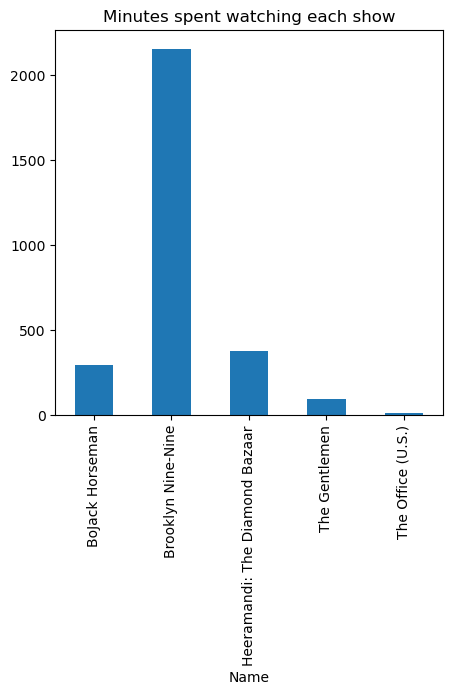

In [23]:
# analyzing the 'shows' dataset
shows['Duration'] = shows['Duration'].dt.total_seconds() / 60
sum_duration_per_show = shows.groupby('Name')['Duration'].sum()
sum_duration_per_show.plot(kind='bar', figsize=(5,5), title='Minutes spent watching each show')

/var/folders/pc/tqs1rn956rz1yh1_59yx49zr0000gn/T/ipykernel_60371/1106846008.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shows['Weekday'] = pd.Categorical(shows['Weekday'], categories=[0,1,2,3,4,5,6], ordered=True)


<Axes: title={'center': 'Shows watched per day'}, xlabel='Weekday'>

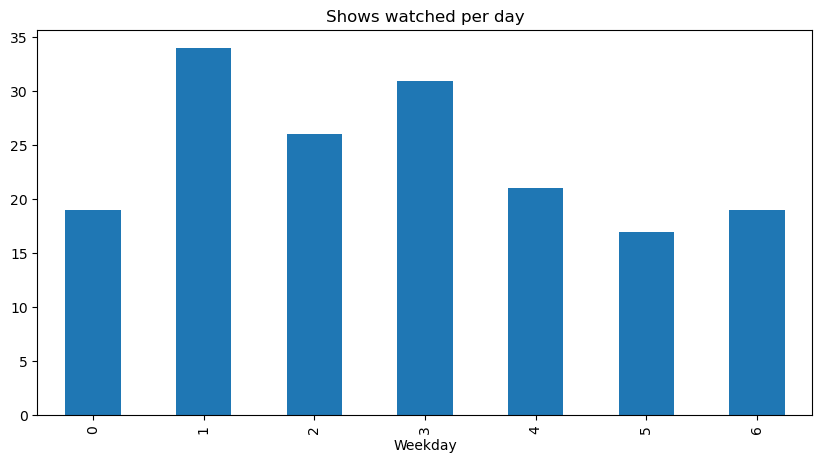

In [24]:
shows['Weekday'] = pd.Categorical(shows['Weekday'], categories=[0,1,2,3,4,5,6], ordered=True)
#by_day_per_show = shows.groupby('Weekday')['Name'].value_counts()
by_day = shows['Weekday'].value_counts()
by_day = by_day.sort_index()
by_day.plot(kind='bar', figsize=(10,5), title='Shows watched per day')

/var/folders/pc/tqs1rn956rz1yh1_59yx49zr0000gn/T/ipykernel_60371/2400310323.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shows['Hour'] = pd.Categorical(shows['Hour'], categories=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23], ordered=True)


<Axes: title={'center': 'Shows watched per hour'}, xlabel='Hour'>

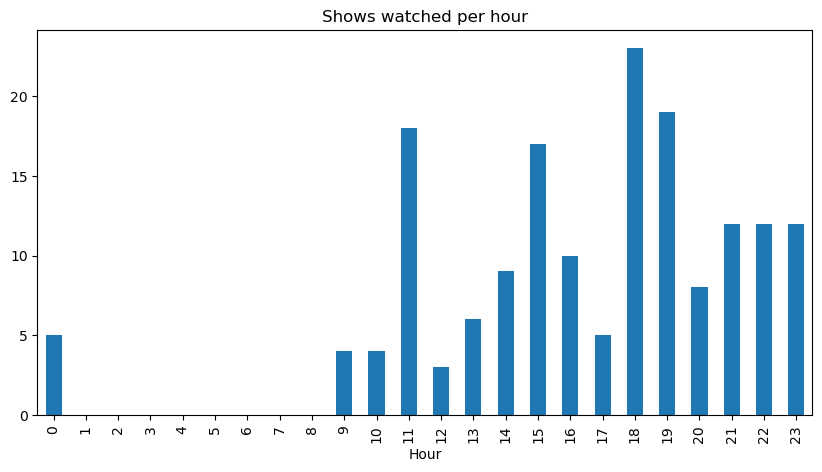

In [25]:
shows['Hour'] = pd.Categorical(shows['Hour'], categories=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23], ordered=True)
#by_hour_per_show = shows.groupby('Name')['Hour'].value_counts()
by_hour = shows['Hour'].value_counts()
by_hour = by_hour.sort_index()
by_hour.plot(kind='bar', figsize=(10,5), title='Shows watched per hour')